# 03 Analysing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
df = pd.read_csv('../data/merged_plots.csv', index_col=0)
df

,title,plot,is_indian
0,10.0 Earthquake,As a series of minor earthquakes start tearing...,0
1,12 Rounds (film),A sting operation to capture arms dealer Miles...,0
2,12 Rounds 3: Lockdown,Detective Tyler Burke and his two men infiltr...,0
3,200 mph,When the older brother (Tommy Nash) he idolize...,0
4,Ablaze (2001 film),Andrew Thomas is an agent tasked with recordin...,0
...,...,...,...
3995,Choked (film),Sarita Pillai and Sushant Pillai are a married...,1
3996,Chumbak,"Chumbak is a coming-of-age story of Baalu, a t...",1
3997,Chungakkarum Veshyakalum,Chungakkarum Veshyakalum is the story of a Mal...,1
3998,Chuzhi,Varghese is a planter who lives with his wife ...,1


# General Overview

In [3]:
print('NaN Values')
print('title:', df['title'].isnull().any())
print('plot:', df['plot'].isnull().any())
print('is_indian:', df['is_indian'].isnull().any())

NaN Values
title: False
plot: False
is_indian: False


## Target Variable Balance

In [4]:
df.groupby('is_indian').size()

is_indian
0    2000
1    2000
dtype: int64

## Plot Length Analysation

In [5]:
plot_lengths = [len(plot) for plot in df['plot']]

In [6]:
from statistics import mean
import numpy as np

In [7]:
mean = mean(plot_lengths).__round__()
print('Mean value:', mean)

Mean value: 2136


In [8]:
std_dev = np.std(plot_lengths).__round__()
print('Standard deviation:', std_dev)

Standard deviation: 1493


## Wordclouds

In [33]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(texts):
    comment_words = ''
    for text in texts:
     
        # typecaste each val to string
        text = str(text)
    
        # split the value
        tokens = text.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
 
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

### American & Indian

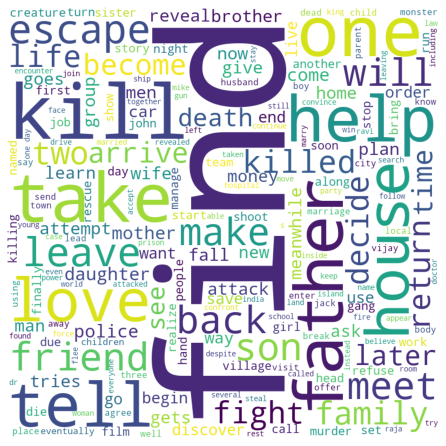

In [28]:
show_wordcloud(df['plot'])

### American Plots

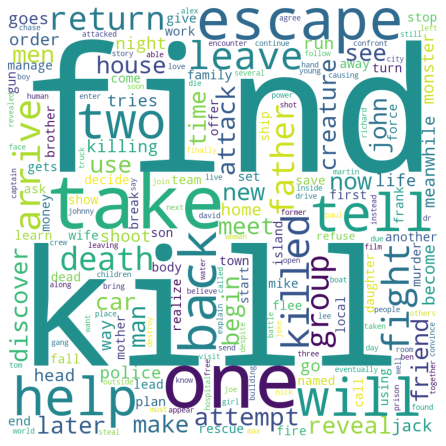

In [30]:
df_amer = pd.read_csv('../data/american_plots.csv', index_col=0)
show_wordcloud(df_amer['plot'])

### Indian Plots

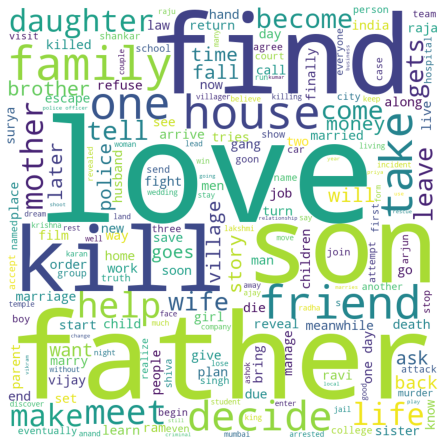

In [31]:
df_ind = pd.read_csv('../data/indian_plots.csv', index_col=0)
show_wordcloud(df_ind['plot'])